In [26]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

cal_housing_sk = fetch_california_housing(as_frame=True)
cal_housing = pd.DataFrame(cal_housing_sk.frame)
cal_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
from sklearn.preprocessing import StandardScaler

cal_housing_features = cal_housing.drop(columns=["MedHouseVal"])
cal_housing_label = cal_housing["MedHouseVal"]

scaler = StandardScaler()
scaler.fit(cal_housing_features)
cal_housing_features_norm = pd.DataFrame(scaler.transform(cal_housing_features),\
                                         columns=cal_housing_features.columns)
cal_housing_features_norm.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_and_compile_model():
    model = keras.Sequential([
        layers.InputLayer(input_shape=(8,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model = build_and_compile_model()
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                576       
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,361
Trainable params: 7,361
Non-trainable params: 0
_________________________________________________________________


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = cal_housing_features_norm
Y = cal_housing_label
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
%time history = dnn_model.fit(x_train, y_train, validation_split=0.2, verbose=1, epochs=100)

Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6546 - val_loss: 0.4596
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4319 - val_loss: 0.4380
Epoch 3/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4090 - val_loss: 0.4162
Epoch 4/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3961 - val_loss: 0.3940
Epoch 5/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3824 - val_loss: 0.3970
Epoch 6/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3757 - val_loss: 0.3991
Epoch 7/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3694 - val_loss: 0.3729
Epoch 8/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3651 - val_loss: 0.3918
Epoch 9/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3644 - val_loss: 0.3863
Epoch 10/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3578 - val_lo

413/413 [==============================] - 1s 1ms/step - loss: 0.2899 - val_loss: 0.3294
Epoch 82/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2904 - val_loss: 0.3310
Epoch 83/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2873 - val_loss: 0.3304
Epoch 84/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2880 - val_loss: 0.3276
Epoch 85/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2873 - val_loss: 0.3319
Epoch 86/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2864 - val_loss: 0.3328
Epoch 87/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2858 - val_loss: 0.3300
Epoch 88/100
413/413 [==============================] - 0s 1ms/step - loss: 0.2875 - val_loss: 0.3371
Epoch 89/100
413/413 [==============================] - 1s 1ms/step - loss: 0.2849 - val_loss: 0.3322
Epoch 90/100
413/413 [==============================] - 0s 1ms/step - loss: 0.2850 - val_loss: 

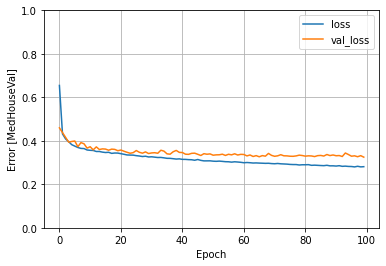

In [31]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MedHouseVal]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [32]:
dnn_regr_mae = dnn_model.evaluate(x_test, y_test, verbose=0)
print("Deep Neural Net MAE: %.3f" % dnn_regr_mae)

Deep Neural Net MAE: 0.325
